In [17]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv("D:\GIT1\Machine-Learning\K Means Clustering\income.csv")
data

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [19]:
#Remove the names
df = data.drop('Name',axis=1)
df

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [20]:
#Standardizing the data sets -- use Standardscaler, MinMaxScaler
scaler = MinMaxScaler()
df_standardized = scaler.fit_transform(df)
df_standardized

array([[0.05882353, 0.21367521],
       [0.17647059, 0.38461538],
       [0.17647059, 0.13675214],
       [0.11764706, 0.12820513],
       [0.94117647, 0.8974359 ],
       [0.76470588, 0.94017094],
       [0.88235294, 0.98290598],
       [0.70588235, 1.        ],
       [0.58823529, 0.94871795],
       [0.52941176, 0.72649573],
       [0.64705882, 0.78632479],
       [0.        , 0.        ],
       [0.05882353, 0.02564103],
       [0.11764706, 0.05128205],
       [0.17647059, 0.03846154],
       [0.35294118, 0.06837607],
       [0.82352941, 0.17094017],
       [0.88235294, 0.15384615],
       [1.        , 0.16239316],
       [0.76470588, 0.2991453 ],
       [0.88235294, 0.31623932],
       [0.76470588, 0.11111111]])

In [21]:
#specifing the number of clusters
k =3

#create and fit the Kmeans model on standardized data
kmeans = KMeans(n_clusters=k,random_state=0)
kmeans.fit(df_standardized)

c:\Users\PC\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\PC\anaconda3\envs\machinelearning\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [22]:
#Add clsuter labels to the original dataFrame
df['cluster'] = kmeans.labels_

#Get cluster centroids in orignal scale
centroids = scaler.inverse_transform(kmeans.cluster_centers_)

In [23]:
# Display the cluster centroids in the original scale
print("Cluster Centroids (Original Scale):")
print(pd.DataFrame(centroids, columns=df.columns[:-1]))

Cluster Centroids (Original Scale):
         Age      Income($)
0  28.333333   58611.111111
1  38.285714  150000.000000
2  40.500000   68666.666667


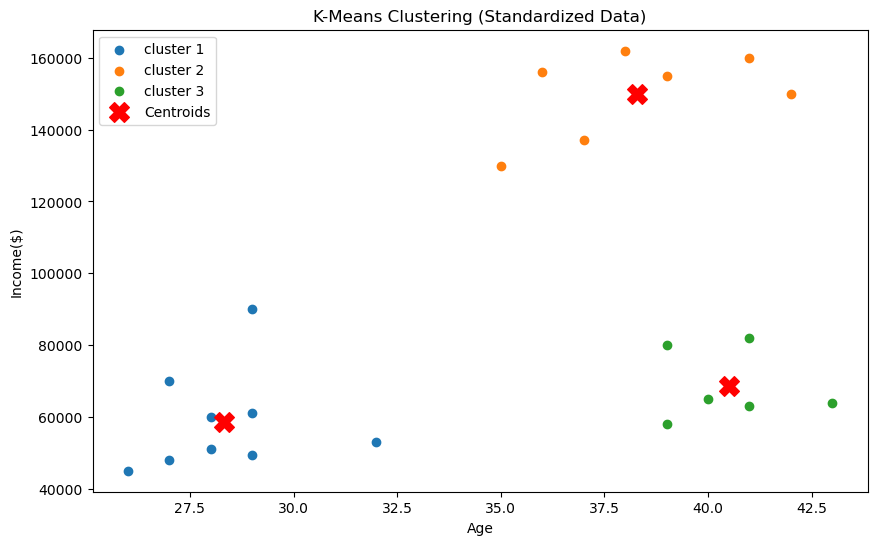

In [24]:
# Plot the data points and centroids
plt.figure(figsize=(10, 6))
for i in range(k):
    plt.scatter(df[df['cluster'] == i]['Age'], df[df['cluster'] == i]['Income($)'], label=f'cluster {i + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.title('K-Means Clustering (Standardized Data)')
plt.legend()
plt.show()

In [25]:
# Predict the cluster for new data points
new_data = {
    'Age': [30, 31, 33],
    'Income($)': [75000, 60000, 140000]
}

# Standardize the new data using the same scaler
new_data_standardized = scaler.transform(pd.DataFrame(new_data))

# Use the K-Means model to predict the cluster for the new data points
predicted_clusters = kmeans.predict(new_data_standardized)

# Display the predicted clusters for the new data points
print("Predicted Clusters for New Data:")
print(predicted_clusters)

Predicted Clusters for New Data:
[0 0 1]
